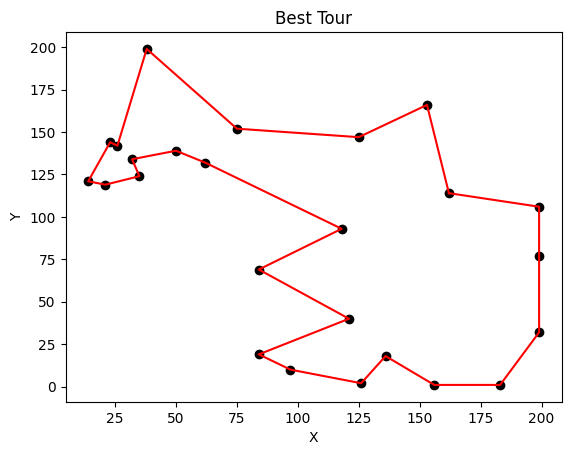

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the TSP problem instance
cities = np.array([
        [199.0, 32.0],
        [75.0, 152.0],
        [121.0, 40.0],
        [38.0, 199.0],
        [162.0, 114.0],
        [199.0, 106.0],
        [125.0, 147.0],
        [118.0, 93.0],
        [26.0, 142.0],
        [21.0, 119.0],
        [50.0, 139.0],
        [84.0, 19.0],
        [136.0, 18.0],
        [35.0, 124.0],
        [32.0, 134.0],
        [126.0, 2.0],
        [153.0, 166.0],
        [23.0, 144.0],
        [84.0, 69.0],
        [199.0, 77.0],
        [97.0, 10.0],
        [14.0, 121.0],
        [156.0, 1.0],
        [62.0, 132.0],
        [183.0, 1.0]
])

num_cities = len(cities)

# Calculate the distance matrix
distance = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        distance[i, j] = np.linalg.norm(cities[i] - cities[j])

# ACO parameters
num_ants = 10
num_iterations = 100
alpha = 1  # Pheromone importance
beta = 1   # Heuristic information importance
rho = 0.1  # Pheromone evaporation rate

# Initialize pheromone trails
pheromone = np.ones((num_cities, num_cities))

# Initialize best tour
tour_de_france = None
best_distance = np.inf

# ACO algorithm
for iteration in range(num_iterations):
    # Initialize ant routes
    ant_routes = np.zeros((num_ants, num_cities), dtype=int)
    
    for ant in range(num_ants):
        # Select starting city randomly
        start_city = np.random.randint(num_cities)
        ant_routes[ant, 0] = start_city
        visited = [start_city]
        
        # Construct the complete tour
        for i in range(1, num_cities):
            current_city = ant_routes[ant, i - 1]
            unvisited = list(set(range(num_cities)) - set(visited))
            
            # Calculate the probabilities of moving to unvisited cities
            if len(unvisited) > 0:
                probabilities = np.zeros(num_cities)
                for j in unvisited:
                    probabilities[j] = (pheromone[current_city, j] ** alpha) * ((1.0 / distance[current_city, j]) ** beta)
                
                probabilities /= np.sum(probabilities)
                
                # Choose the next city based on the probabilities
                next_city = np.random.choice(range(num_cities), p=probabilities)
            else:
                # Assign equal probabilities to all cities
                probabilities = np.ones(num_cities) / num_cities
                
                # Randomly choose any unvisited city
                next_city = np.random.choice(range(num_cities))
                
            ant_routes[ant, i] = next_city
            visited.append(next_city)
        
        # Calculate the tour length
        tour_length = sum(distance[ant_routes[ant, i - 1], ant_routes[ant, i]] for i in range(num_cities))
        
        # Update the best tour if applicable
        if tour_length < best_distance:
            best_distance = tour_length
            tour_de_france = ant_routes[ant]
    
    # Update pheromone trails
    pheromone *= (1 - rho)
    for ant in range(num_ants):
        for i in range(num_cities - 1):
            current_city = ant_routes[ant, i]
            next_city = ant_routes[ant, i + 1]
            pheromone[current_city, next_city] += 1.0 / distance[current_city, next_city]
    
# Plot the best tour
tour_de_france = np.append(tour_de_france, tour_de_france[0])  # Close the loop
plt.figure()
plt.plot(cities[:, 0], cities[:, 1], 'ko')
plt.plot(cities[tour_de_france, 0], cities[tour_de_france, 1], 'r-')
plt.title('Best Tour')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
